# Implement Linear Regression From Scratch (with Mean Absoluter Error)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 
Implement Linear Regression with *Mean Absolute Error* as the cost function from scratch. Compare your results with the Linear Regression module of *Scikit-Learn*.

### Gradient descent to solve linear regression with mean absolute error (MAE) loss function
Mean Absolute Error cost function for a linear regression model :
$$MAE(w,b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} |f_{w,b}(x^{(i)}) - y^{(i)}|\tag{1}$$ 

where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

We will implement Linear Regression model using gradient descent from scratch. *Gradient Descent* was described as

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, parameters $w$, $b$ are updated simultaneously.

The gradient is defined as:
$$
\begin{align}
\frac{\partial MAE(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} sgn(f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
\frac{\partial MAE(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} sgn(f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

where
$$
\begin{align}
sgn(x) &= \frac{x}{|x|} \tag{6}
\end{align}
$$
Here simultaniously means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [2]:
from sklearn.metrics import r2_score

class myLinearRegression():

    """
        Linear Regression model with mean absolute error as cost function

        Parameters
        ----------

        learning_rate : float
                        learning rate of gradient descent algorithm
        n_iter : int
                number of iterations or epoch of gradient descent algorithm
        
        Attributes
        ----------
        lr : float
             learning rate of gradient descent algorithm
        n_iter : int
                 number of iterations or epoch of gradient descent algorithm
        weights : numpy.array
                  weights of our model are initialized with random numbers in [0,1]  
        bias : float
               bias of our model which is initialized with 0

        Methods
        -------
        fit(X,y)
            training the weights with regards to dataset (X and y)
        predict(X)
                predict target values corresponding to X
        _compute_gradient(X,y_true,y_predicted)
                          computing gradients of mae cost function

    """

    def __init__(self,learning_rate = 0.01,n_iter=10000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    # computing gradients of mae cost function
    def _compute_gradient(self,X,y_true,y_predicted):
        n = X.shape[0]
        dw = (1 / n) * np.dot(np.sign(y_predicted - y_true).T, X)
        db = (1 / n) * np.sum(np.sign(y_predicted - y_true))
        return dw , db

    def predict(self,X):
        return np.dot(X,self.weights) + self.bias

    def fit(self,X,y):
        # initializing weights and bias
        self.weights = np.random.rand(X.shape[1])
        self.bias = 0 

        for _ in range(self.n_iter):
            y_predicted = self.predict(X)
            dw , db = self._compute_gradient(X,y,y_predicted)
            
            # updating weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def score(self, X, y, sample_weight=None):
        return r2_score(y, self.predict(X), sample_weight=sample_weight)

We will preform our implemented linear regression model on a simple dataset.

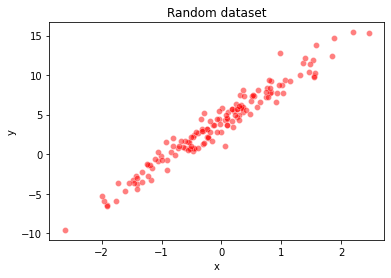

In [3]:
#generating random dataset
np.random.seed(42)
x = np.random.randn(150, 1)
y = 4 + 5 * x + np.random.randn(150, 1)

#plotting
sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color='red', alpha=0.5)
plt.title('Random dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
linear_regression = myLinearRegression()
y = y.squeeze()
linear_regression.fit(x, y)

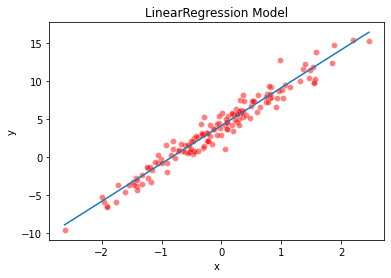

In [5]:
x_range = np.linspace(x.min(), x.max(), num=400)
predicted_y1 = linear_regression.predict(x_range.reshape(400, 1))

sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color='red', alpha=0.5)
plt.plot(x_range, predicted_y1)
plt.title('LinearRegression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Linear Regression Using Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression

Linear_Regression = LinearRegression()
Linear_Regression.fit(x, y)

LinearRegression()

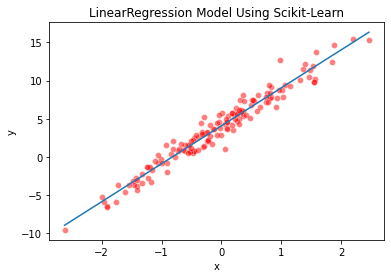

In [7]:
x_range = np.linspace(x.min(), x.max(), num=400)
predicted_y2 = Linear_Regression.predict(x_range.reshape(400, 1))

sns.scatterplot(x=x.squeeze(), y=y.squeeze(), color='red', alpha=0.5)
plt.plot(x_range, predicted_y2)
plt.title("LinearRegression Model Using Scikit-Learn")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Show Two Model in the same plot

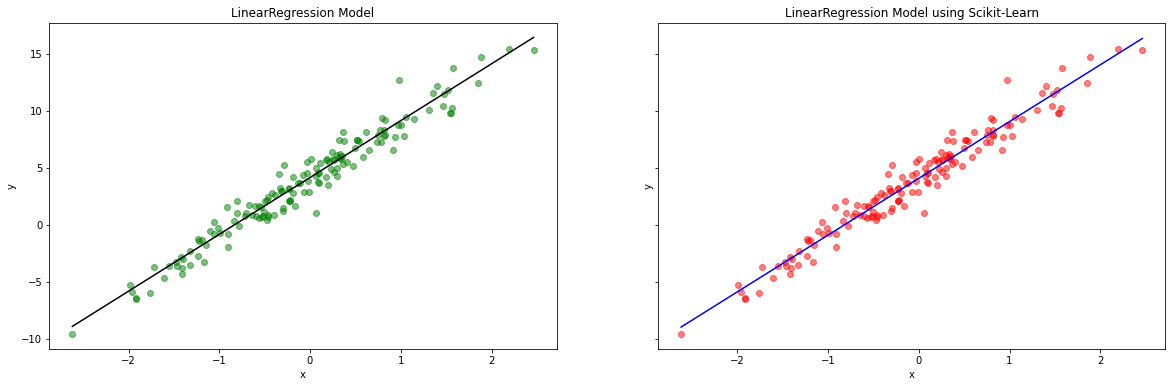

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

ax[0].scatter(x=x.squeeze(), y=y.squeeze(), color='green', alpha=0.5)
ax[0].plot(x_range, predicted_y1, c='black')
ax[0].set_title("LinearRegression Model")
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x=x.squeeze(), y=y.squeeze(), color='red', alpha=0.5)
ax[1].plot(x_range, predicted_y2, c='blue')
ax[1].set_title("LinearRegression Model using Scikit-Learn")
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

We can also compute the mean absolute error:

In [9]:
import sklearn.metrics as metrics

def regression_results(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred) 
    mse = metrics.mean_squared_error(y_test, y_pred) 
    r2 = metrics.r2_score(y_test, y_pred)

    print('R-Square: ', round(r2, 10))
    print('MAE: ', round(mae, 10))
    print('MSE: ', round(mse, 10))
    print('RMSE: ', round(np.sqrt(mse), 10))

In [10]:
y_predicted1 = linear_regression.predict(x)
y_predicted2 = Linear_Regression.predict(x)
regression_results(y, y_predicted1)
print()
regression_results(y, y_predicted1)

R-Square:  0.9544173916
MAE:  0.7990670008
MSE:  1.0420760166
RMSE:  1.0208212462

R-Square:  0.9544173916
MAE:  0.7990670008
MSE:  1.0420760166
RMSE:  1.0208212462


### Run Linear Regression On Diabetes Dataset

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

linear_regression = make_pipeline(StandardScaler(), myLinearRegression(n_iter=40000))
Linear_Regression = make_pipeline(StandardScaler(), LinearRegression())
diabetes = load_diabetes()

In [118]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [119]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [120]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [121]:
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [122]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [123]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [124]:
X, y = df, diabetes['target']

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
linear_regression.fit(x_train, y_train)
Linear_Regression.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [127]:
y_predicted1 = linear_regression.predict(x_test)
y_predicted2 = Linear_Regression.predict(x_test)

print('LinearRegression with MAE as cost function: ')
regression_results(y_test, y_predicted1)
print()
print('LinearRegression of Scikit-Learn: ')
regression_results(y_test, y_predicted2)

LinearRegression with MAE as cost function: 
R-Square:  0.4407504203
MAE:  43.2337415356
MSE:  2962.9891383111
RMSE:  54.4333458306

LinearRegression of Scikit-Learn: 
R-Square:  0.4526066022
MAE:  42.793893042
MSE:  2900.1732878832
RMSE:  53.8532569849


## Conclusion for this problem
A linear regression model minimizes the mean absolute error on the training set. This means that the parameters obtained after the fit (i.e. coef_ and intercept_) are the optimal parameters that minimizes the mean absolute error. In other words, any other choice of parameters will yield a model with a higher mean absolute error on the training set.